# Exploratory Data Analysis - Linear Regression

In the previous video you have learned about one of the most common applications of Maximum Likelihood Estimation (MLE), which is linear regression. Linear regression is a statistical model that is used to estimate a linear relationship between two or more variables. In case of simple linear regression you have one independent (explanatory) variable and one dependent variable (response), while in case of multiple linear regression, you have more than one explanatory variable. You can read more about linear regression on [Wikipedia](https://en.wikipedia.org/wiki/Linear_regression).

In this notebook, you will create your own linear regression model and fit it to one and more explanatory variables to predict the response. You will use an open-source, commercially usable machine learning toolkit called [scikit-learn](https://scikit-learn.org/stable/index.html). This toolkit contains implementations of many machine learning and statistical algorithms.

# 1. Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import various functions from scikit-learn to help with the model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Import functions to create interactive widgets
import ipywidgets as widgets
from ipywidgets import interact_manual, fixed

# 2. Import and Process the Data

You will work with the "World happiness" dataset that you have already seen in the "Introduction to Pandas" notebook. The first thing you need to do is open the notebook and clean up the data. This code will rename columns so that there are no white spaces and drop any missing values.

In [2]:
# Open the notebook
# df = pd.read_csv('data/world_happiness.csv')
df = pd.read_excel('data/world_happiness.xlsx')

# Rename the column names so they dont contain spaces
df = df.rename(columns={i: "_".join(i.split(" ")).lower() for i in df.columns})
df.columns = [col.replace("explained_by:_", "") for col in df.columns]

# Drop all of the rows which contain empty values. These will not be good for fitting.
df = df.dropna()

# Show the dataframe
df.head()

,country_name,ladder_score,upperwhisker,lowerwhisker,log_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,dystopia_+_residual
0,Finland,7.7407,7.814808,7.666591,1.844054,1.572367,0.694793,0.859294,0.141674,0.546158,2.082367
1,Denmark,7.5827,7.665297,7.500103,1.907798,1.520361,0.698944,0.822740,0.203579,0.548413,1.880887
2,Iceland,7.5251,7.617527,7.432673,1.880718,1.616525,0.718345,0.818509,0.258344,0.182473,2.050233
3,Sweden,7.3441,7.421563,7.266637,1.878146,1.500826,0.723871,0.838269,0.221455,0.523795,1.657707
4,Israel,7.3411,7.405165,7.277036,1.802934,1.512793,0.739816,0.641463,0.153205,0.192823,2.298026


# 3. Inspect the Data

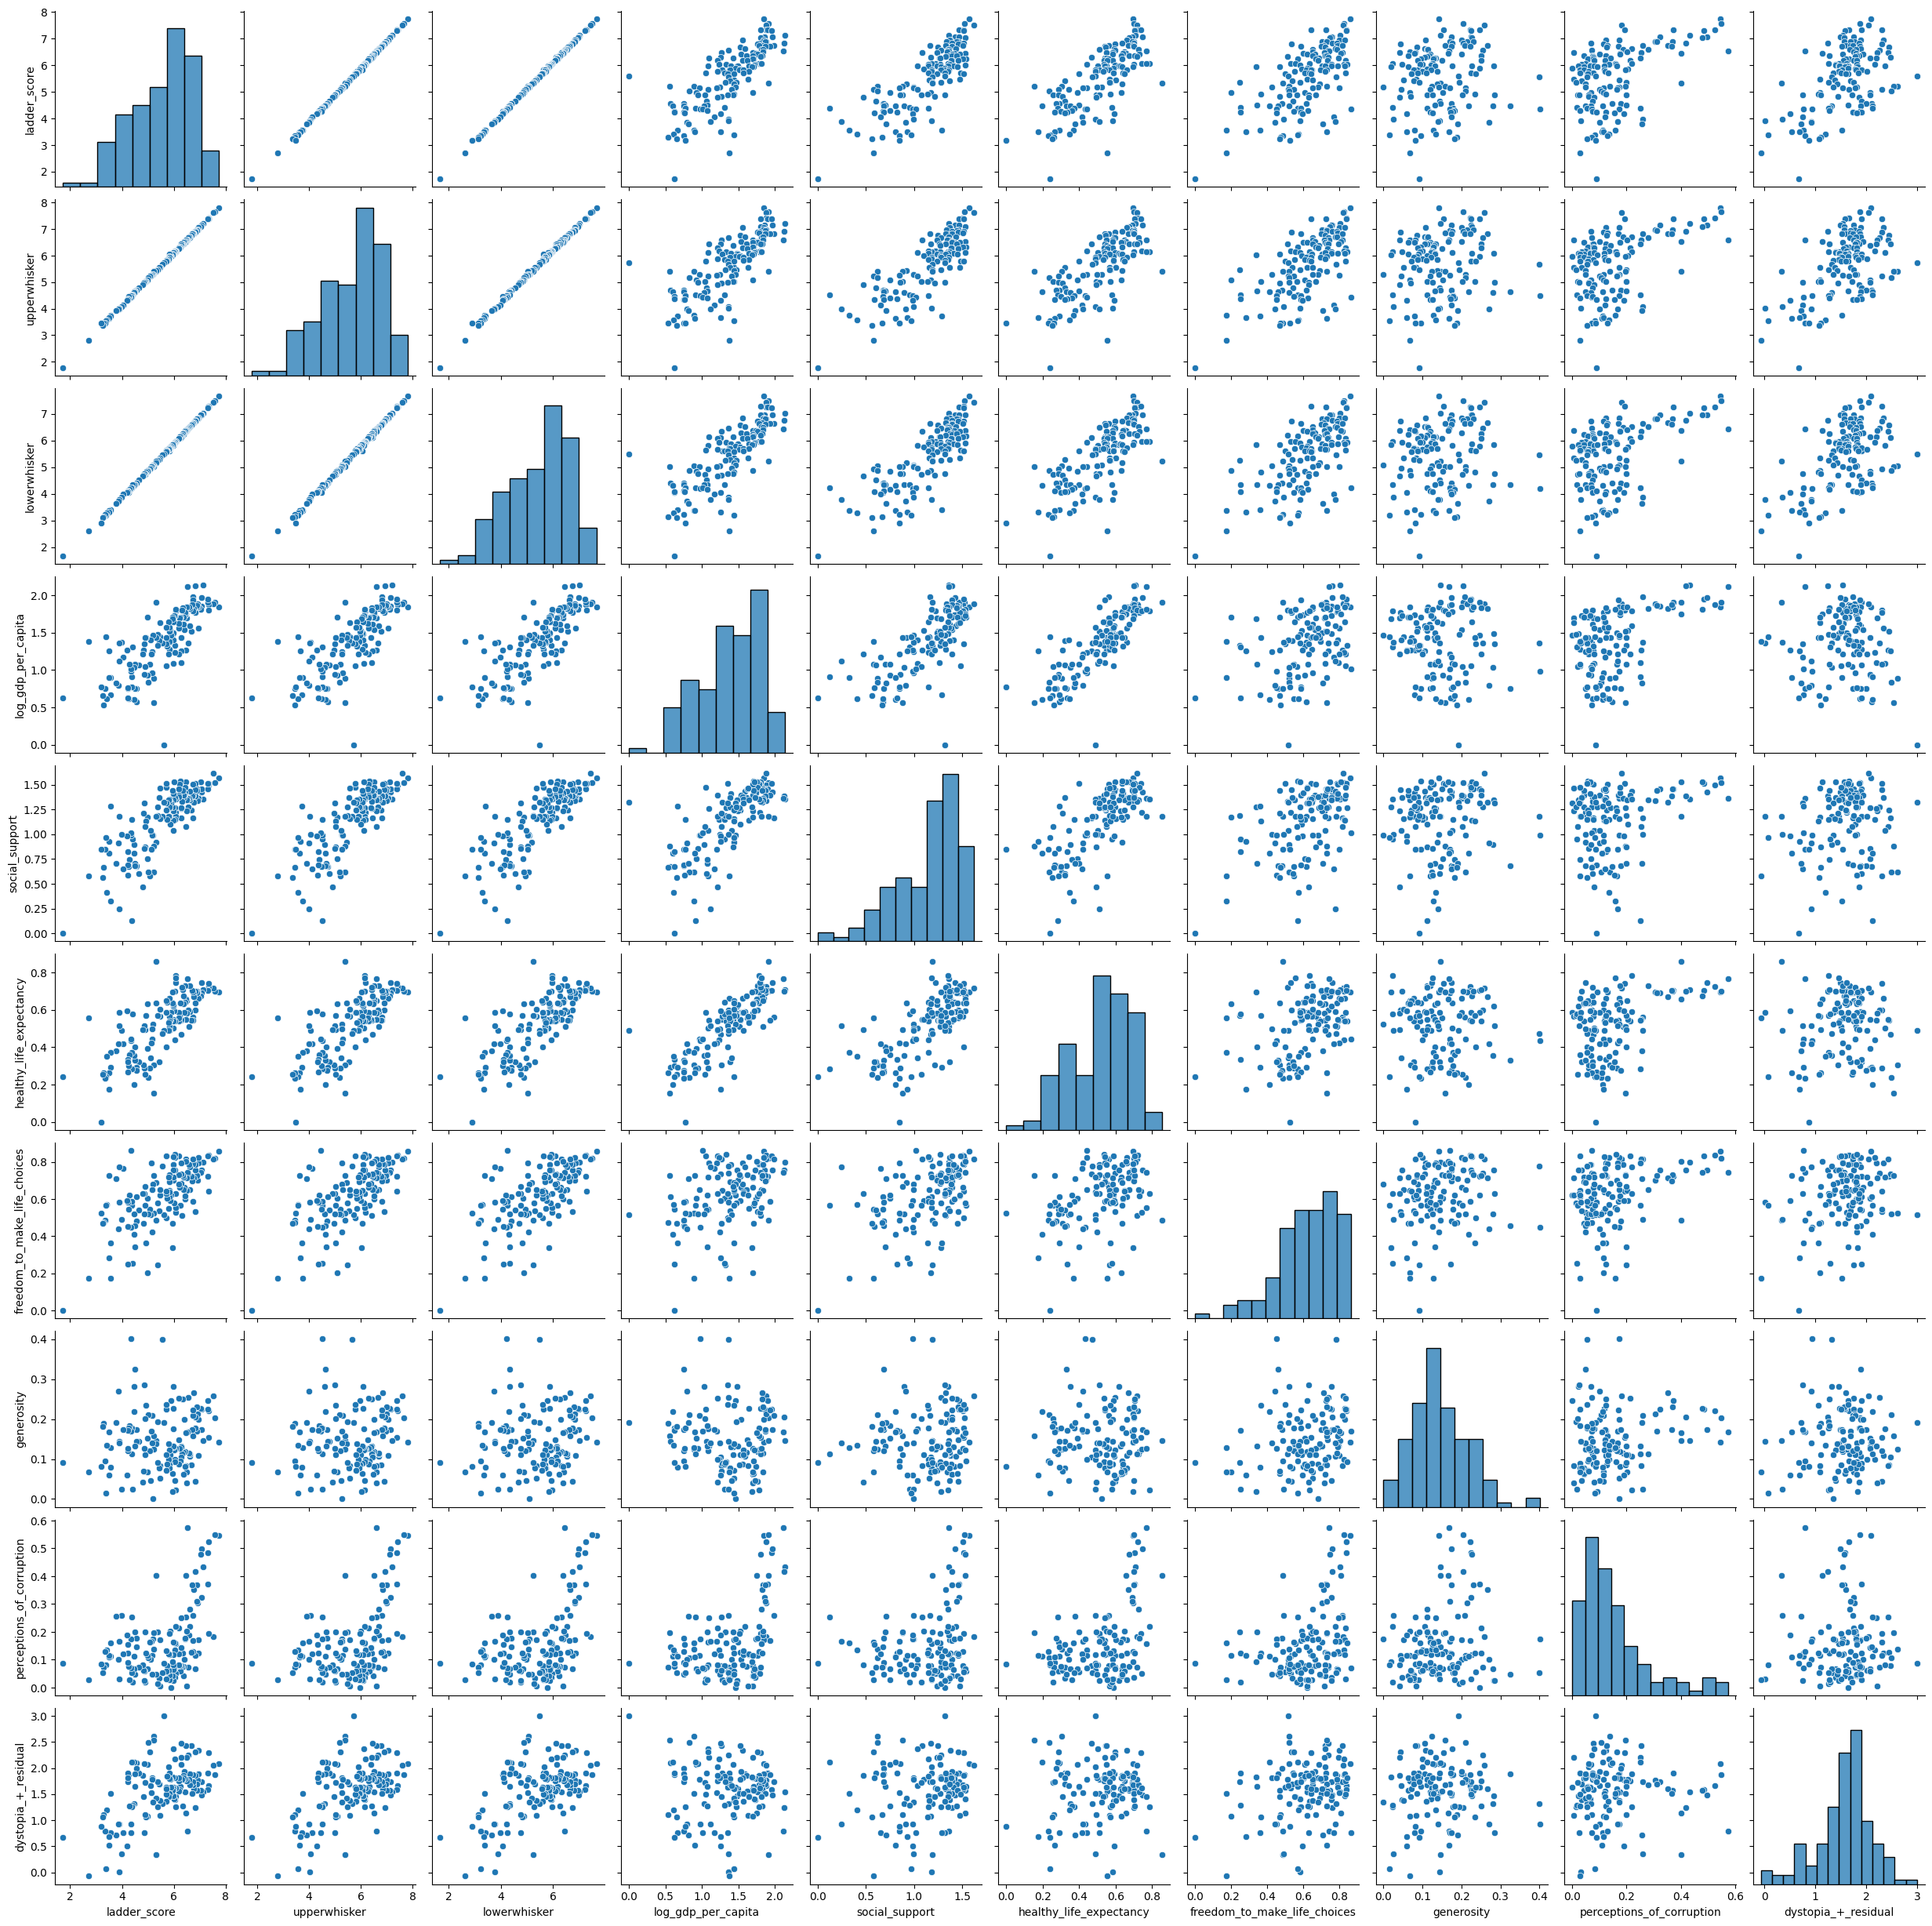

In [3]:
sns.pairplot(df)

# 4. Simple Linear Regression

Now that you have a good sense of the data, you can choose your independent (X) and dependent (y) variable. Let's start with the obvious ones: use the GDP per capita to explain the value on the life ladder, which measures the happiness of the people.

## 4.1 Define the Variables

In machine learning you would typically not use the same data to train and evaluate your model and that is because you want to know how well the model generalizes to new (previously unseen) data. 

Note the uppercase X and lowercase y. This is to emphasize that the X variable is two dimensional, while the y variable is one dimensional. This is for better generalization for when you in fact use more than one explanatory variable.

In [4]:
# Get the data from the dataframe.
X = df[['log_gdp_per_capita']]
y = df['ladder_score']

# from sklearn.model_selection import train_test_split
# Create the train-test split
# Note the test_size=0.2. This means you will use 20% of the data in your test set.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Show how X_train and y_train look like
print('X type:', type(X_train))
print('y type:', type(y_train))
print('X shape:', X_train.shape)
print('y shape:', y_train.shape)
print('\n')
print(f"Independent (X) variable:\n{X_train.values}\n")
print('\n ========= \n')
print(f"Dependent (y) variable:\n{y_train.values}")

# print(f"Independent (X) variable:\n{X_train.head(5)}\n")
# print('\n ========= \n')
# print(f"Dependent (y) variable:\n{y_train.head(5)}")

X type: <class 'pandas.core.frame.DataFrame'>
y type: <class 'pandas.core.series.Series'>
X shape: (112, 1)
y shape: (112,)


Independent (X) variable:
[[2.12882853]
 [1.76568222]
 [1.81034887]
 [1.30644512]
 [1.34989846]
 [0.83056736]
 [1.81498611]
 [1.70029426]
 [1.47530878]
 [0.6542784 ]
 [1.280195  ]
 [1.84405351]
 [1.72207117]
 [1.36423588]
 [1.80015159]
 [1.52074146]
 [1.08013117]
 [0.79156035]
 [0.91357493]
 [1.52565694]
 [1.70554197]
 [1.86804104]
 [1.24870265]
 [1.82693207]
 [1.93886304]
 [0.57284975]
 [1.4369055 ]
 [0.94324434]
 [1.56174743]
 [1.84158003]
 [1.32354045]
 [1.05427361]
 [1.85425842]
 [1.75184727]
 [0.        ]
 [1.59556925]
 [0.89234102]
 [1.6839155 ]
 [1.57042015]
 [0.53367001]
 [1.3305006 ]
 [1.9006567 ]
 [1.44358838]
 [1.43788886]
 [1.79379892]
 [1.76618874]
 [1.7377038 ]
 [1.43518877]
 [2.1405189 ]
 [1.42952585]
 [1.64219224]
 [1.90871108]
 [0.61877793]
 [1.36997509]
 [1.97026849]
 [1.88526535]
 [1.4446913 ]
 [1.87814558]
 [1.78319144]
 [1.70171607]
 [1.3154

## 4.2 Create and Fit the Linear Regression Model

In [5]:
# from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)

The first part of the statement, `LinearRegression()`, is instantiating a linear regression model. You could also set some parameters to this function. The `fit(X_train, y_train)` method is then performing the actual trainingof the model, fitting its parameters to your training data. 

## 4.3 View Parameters

You can write down the equation for the line that you fit to the data as $\hat{y}=Wx+b$, where $x$ is the explanatory variable (or variables) and $\hat{y}$ is your response, while $W$ and $b$ are the parameters that you fit.

In [6]:
b = lr.intercept_
w = lr.coef_
print(f"Model parameters:\nw: {w},\nb: {b}")

Model parameters:
w: [2.12001844],
b: 2.584854381183477


## 4.4 Make Predictions and Evaluate the Model

The default way to calculate the predictions on the test set is to use `.predict()`. You will use `.predict()` on the whole test set at once. 

In [7]:
# Make a prediction using lr.predict()
y_test_preds = lr.predict(X_test)

# Make a prediction by hand using w, b.
y_pred = np.dot(X_test, w) + b

# Check whether both results are the same
print(
    f"prediction using np.dot() and predictions using lr.predict are the same: {(y_pred == y_test_preds).all()}\n")


# from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_test_preds)
print(f"Mean Absolute Error on the test set: {mae:.2f}")

prediction using np.dot() and predictions using lr.predict are the same: True

Mean Absolute Error on the test set: 0.56


## 4.5 Plot Results

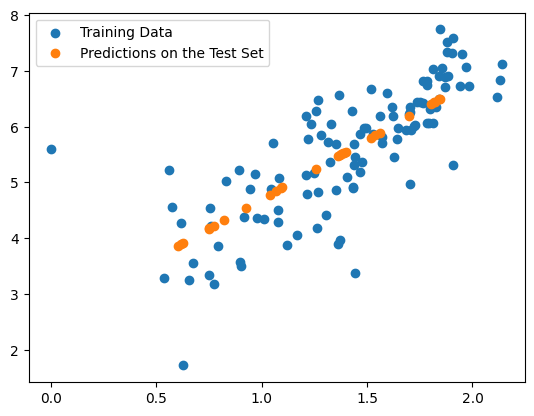

In [8]:
plt.figure()
plt.scatter(X_train, y_train, label='Training Data')
plt.scatter(X_test, y_pred, label='Predictions on the Test Set')
plt.legend()

You can see that all of the predictions lie on a straight line that fits the data best. The data, however, has a lot more variation and is not perfectly explained just by this one line. As you know there are many more variables in this dataset and some other variables may be able to explain this variation. You will see how this plays out using multiple linear regression in the next section.

# 4. Multiple Linear Regression

Often there is more than just one variable that explains the behavior of other variables. In this case you can use multiple linear regression. In the cell below there is a function defined to make your life easier:

- `fit_and_plot_linear_model`:

In [9]:
def fit_and_plot_linear_model(data, features):

    # Create a list of features you want to use as explanatory variables
    features = list(features)

    # Create the linear regression model

    # Select the data
    y = data['ladder_score']
    X = data[features]
    # Create a train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    # Fit the linear regression model
    lr = LinearRegression().fit(X_train, y_train)

    # Calculate the feature imporance
    # most_important, feature_importance_df = utils.calculate_feature_importance(
    #     features, lr, X_test, y_test)

    # Prepare the data for plotting
    # X_plot = data[most_important]
    # Y_real = data["ladder_score"]
    # X_test_plot = X_test[most_important]
    y_test_preds = lr.predict(X_test)

    # # Plot the data and the model
    # utils.plot_happiness(most_important, X_plot, Y_real,
    #                      X_test_plot, y_test_preds)

    # # Create a plot of feature imporance if there is more than one feature
    # if feature_importance_df is not None:
    #     utils.plot_feature_importance(feature_importance_df)

    # Calculate and print out the mean absolute error
    mae = metrics.mean_absolute_error(y_test, y_test_preds)
    print(f"Mean Absolute Error: {mae:.2f}\n")

In [10]:
print("hi")

hi


In [11]:
# List of all possible predictor variables
predictors = ['log_gdp_per_capita',
              'social_support', 'healthy_life_expectancy']
fit_and_plot_linear_model(df, predictors)

Mean Absolute Error: 0.44



In [12]:
# # List of all possible predictor variables
# predictors = ['year', 'log_gdp_per_capita', 'social_support', 'healthy_life_expectancy_at_birth',
#               'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption', 'positive_affect', 'negative_affect']

# # Widget for feature selection
# feature_selection = widgets.SelectMultiple(
#     options=predictors, value=predictors,
#     description="Features", disabled=False,
# )

# # Interactive call to the function
# interact_manual(fit_and_plot_linear_model, data=fixed(df),
#                 features=feature_selection)